In [ ]:
import math, copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
x_train = [30, 32.4138, 34.8276, 37.2414, 39.6552]
y_train = [448.524, 509.248, 535.104, 551.432, 623.418]
print("x_train:", x_train)
print("y_train:", y_train)

In [31]:
def loss(x, y, w0=0, w1=1):
    m = len(x)
    cost = 0.0
    for i in range(m):
        f_wb_i = w1 * x[i] + w0
        cost = cost + (f_wb_i - y[i])**2
    total_cost = (1 / (2)) * cost
    return total_cost

def gradient(x, y, w0=0, w1=1):
    n = len(x)
    dL_dw0 = 0.0
    dL_dw1 = 0.0
    for i in range(n):
        err = (w0 + w1 * x[i]) - y[i]
        dL_dw0 += err
        dL_dw1 += err * x[i]
    return dL_dw0, dL_dw1

def gradient_descent(x, y, w0=0, w1=1, lr=0.01, epochs=1000):
    w0_history = []
    w1_history = []
    loss_history = []

    x = np.array(x)
    y = np.array(y)
    for i in range(epochs):
        dL_dw0, dL_dw1 = gradient(x, y, w0, w1)
    
        w0 -= lr * dL_dw0
        w1 -= lr * dL_dw1
    
        w0_history.append(w0)
        w1_history.append(w1)
        current_loss = loss(x, y, w0, w1)
        loss_history.append(current_loss)
    
        if i % (epochs // 10) == 0 or i == epochs - 1:
             print(f"Epoch {i:5d}: Loss = {current_loss:.4e}, w0 = {w0:.4f}, w1 = {w1:.4f}")

    return w0, w1, loss_history

In [33]:
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.title("Loss over epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
def plot_data(x, y, w0, w1):    
    plt.scatter(x, y, color='blue', label='Data points')
    x_range = np.linspace(min(x), max(x), 100)
    y_range = w0 + w1 * x_range
    plt.plot(x_range, y_range, color='red', label='Regression line')
    plt.title("Linear Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

Starting Gradient Descent...
Epoch     0: Loss = 9.4684e+04, w0 = 0.2494, w1 = 9.7734
Epoch     5: Loss = 4.5926e+02, w0 = 0.4049, w1 = 15.2686
Epoch    10: Loss = 4.5212e+02, w0 = 0.4055, w1 = 15.3164
Epoch    15: Loss = 4.5212e+02, w0 = 0.4047, w1 = 15.3168
Epoch    20: Loss = 4.5212e+02, w0 = 0.4039, w1 = 15.3169
Epoch    25: Loss = 4.5212e+02, w0 = 0.4032, w1 = 15.3169
Epoch    30: Loss = 4.5212e+02, w0 = 0.4024, w1 = 15.3169
Epoch    35: Loss = 4.5212e+02, w0 = 0.4016, w1 = 15.3169
Epoch    40: Loss = 4.5211e+02, w0 = 0.4008, w1 = 15.3169
Epoch    45: Loss = 4.5211e+02, w0 = 0.4001, w1 = 15.3170
Epoch    49: Loss = 4.5211e+02, w0 = 0.3995, w1 = 15.3170
Gradient Descent finished.

Final weights: w0 = 0.39946167099555424 , w1 = 15.3169874182959
Final loss: 452.1123670941829


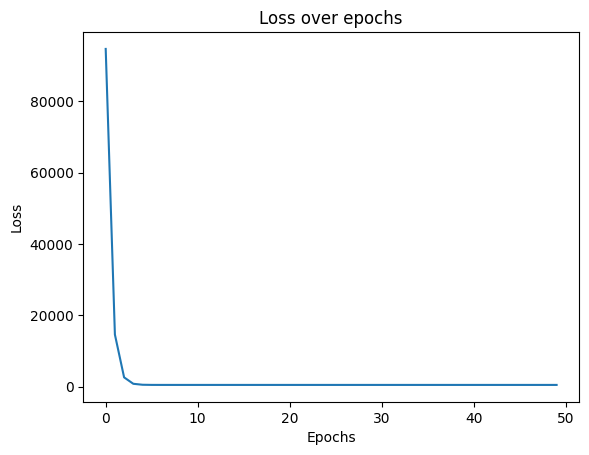

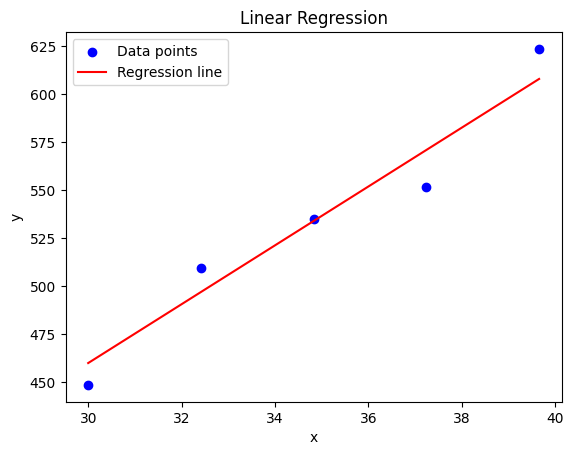

In [36]:
def main():
    learning_rate = 0.0001
    epochs = 50

    w0 = 0.0
    w1 = 1.0

    x_train_np = np.array(x_train)
    y_train_np = np.array(y_train)

    print("Starting Gradient Descent...")
    w0, w1, loss_history = gradient_descent(x_train_np, y_train_np, w0, w1, learning_rate, epochs)
    print("Gradient Descent finished.")

    print("\nFinal weights: w0 =", w0, ", w1 =", w1)
    final_loss = loss(x_train_np, y_train_np, w0, w1)
    print("Final loss:", final_loss)

    plot_loss(loss_history)

    plot_data(x_train_np, y_train_np, w0, w1)
    
if __name__ == "__main__":
    main()

In [32]:
def predict(x, w0, w1):
    return w0 + w1 * x

w0 = 0.39946167099555424
w1 = 15.3169874182959

predict_value = predict(35, w0, w1)
print(f"Predicted value for x=35: {predict_value:.4f}")


Predicted value for x=35: 536.4940
